In [1]:
from google.colab import files
uploaded = files.upload()

Saving raw_magicBricks.csv to raw_magicBricks.csv


In [3]:
import pandas as pd

df = pd.read_csv('raw_magicBricks.csv')
df.head()

,city,name,developer,rera-id,price,water-availability,status-of-electricity,lift,furnishing,bedrooms,bathrooms,status,configuration,tower-and-unit-details,recommended-for,neighborhood,roads,safety,cleanliness,public-transport,parking,connectivity,traffic,school,restaurants,hospital,market,locality-rating
0,Mumbai,71Midtown,ParadigmRealty&DotomRealty,P51800028761,1.31Cr,24HoursAvailable,No/RarePowercut,2,Unfurnished,2,2,UnderConstruction,"1,2BHKFlat","6Towers,1000Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,4.5
1,Mumbai,SanduSanskar,SanduDevelopers,NaN,1.87Cr,EastTalktoourbestVastuConsultantstogetinstants...,P51800006033(TheprojecthasbeenregisteredviaMah...,"Pool,Garden/Park,MainRoad","Mosaic,Vitrified,Wooden,CeramicTiles,Marble,No...",2SeeDimensionsBedroom112X10ftBedroom212X10ft,2,UnderConstruction,"1,2,3BHKFlat",122Units,"Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,4.5
2,Mumbai,SaffronResidency,AyodhyaConstructionsCo.,P51800007485,1.75Cr,No/RarePowercut,3,Unfurnished,NaN,3,2,UnderConstruction,"1,2,3BHKFlat","2Towers,216Units","Retirees,,Family,,Couple,,",4,4,4,3,4,3,4,3,4,3,4,4,4.1
3,Mumbai,RomellVasanthi,RomellGroup,P51800022238,1.89Cr,1Covered,24HoursAvailable,No/RarePowercut,2,2,2,UnderConstruction,2BHKFlat,"1Tower,51Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,4.6
4,Mumbai,NorthernHills,NRoseDevelopersPvt.Ltd.,P51800020350,1.29Cr,24HoursAvailable,No/RarePowercut,Unfurnished,61,2,2,UnderConstruction,"2,3BHKFlat","2Towers,412Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,4.4


In [2]:
!ls

'newmagicbricks6 (1).csv'   sample_data


In [41]:
import pandas as pd

df = pd.read_csv('newmagicbricks6 (1).csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,configuration,tower-and-unit-details,recommended-for,neighborhood,roads,safety,cleanliness,public-transport,parking,connectivity,traffic,school,restaurants,hospital,market,locality-rating,verified_id,capacity
0,0,0,Mumbai,13100000,1.0,2.0,1.0,4,4,0,"1,4BHKFlat","6Towers,1000Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,45,1,4
1,1,1,Mumbai,18700000,0.0,0.0,0.0,4,4,0,"1,4,3BHKFlat",144Units,"Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,45,1,4
2,2,4,Mumbai,17500000,2.0,0.0,0.0,3,4,0,"1,4,3BHKFlat","4Towers,416Units","Retirees,,Family,,Couple,,",4,4,4,3,4,3,4,3,4,3,4,4,41,1,5
3,3,3,Mumbai,18900000,0.0,1.0,0.0,4,4,0,4BHKFlat,"1Tower,51Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,46,1,4
4,4,4,Mumbai,14900000,1.0,2.0,0.0,4,4,0,"4,3BHKFlat","4Towers,414Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,44,1,4


In [42]:
df = df.drop('configuration', axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,tower-and-unit-details,recommended-for,neighborhood,roads,safety,cleanliness,public-transport,parking,connectivity,traffic,school,restaurants,hospital,market,locality-rating,verified_id,capacity
0,0,0,Mumbai,13100000,1.0,2.0,1.0,4,4,0,"6Towers,1000Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,45,1,4
1,1,1,Mumbai,18700000,0.0,0.0,0.0,4,4,0,144Units,"Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,45,1,4
2,2,4,Mumbai,17500000,2.0,0.0,0.0,3,4,0,"4Towers,416Units","Retirees,,Family,,Couple,,",4,4,4,3,4,3,4,3,4,3,4,4,41,1,5
3,3,3,Mumbai,18900000,0.0,1.0,0.0,4,4,0,"1Tower,51Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,46,1,4
4,4,4,Mumbai,14900000,1.0,2.0,0.0,4,4,0,"4Towers,414Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,44,1,4


In [43]:
import re

towers_units = df['tower-and-unit-details'].tolist()
for i, x in enumerate(towers_units):
  if x.find("Tower")!=-1 and x.find("Unit")!=-1:
    continue
  elif x.find("Tower")!=-1:
    # print(0)
    towers_units[i] = x + ",0Unit"
  elif x.find("Unit")!=-1:
    towers_units[i] = "0Tower," + x

In [44]:
towers_units = list(map(lambda x: list(map(lambda x: list(map(int ,re.findall(r'\d+', x))) ,x.split(','))), towers_units))
towers, units = map(list, zip(*towers_units))

In [45]:
df['towers'] = list(map(lambda x: x[0], towers))
df['units'] = list(map(lambda x: x[0], units))

In [46]:
df.head()

,Unnamed: 0,Unnamed: 0.1,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,tower-and-unit-details,recommended-for,neighborhood,roads,safety,cleanliness,public-transport,parking,connectivity,traffic,school,restaurants,hospital,market,locality-rating,verified_id,capacity,towers,units
0,0,0,Mumbai,13100000,1.0,2.0,1.0,4,4,0,"6Towers,1000Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,45,1,4,6,1000
1,1,1,Mumbai,18700000,0.0,0.0,0.0,4,4,0,144Units,"Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,45,1,4,0,144
2,2,4,Mumbai,17500000,2.0,0.0,0.0,3,4,0,"4Towers,416Units","Retirees,,Family,,Couple,,",4,4,4,3,4,3,4,3,4,3,4,4,41,1,5,4,416
3,3,3,Mumbai,18900000,0.0,1.0,0.0,4,4,0,"1Tower,51Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,46,1,4,1,51
4,4,4,Mumbai,14900000,1.0,2.0,0.0,4,4,0,"4Towers,414Units","Retirees,,Family,,Couple,,",4,4,4,4,4,4,4,3,4,4,4,4,44,1,4,4,414


In [47]:
recomm_list = ['Retirees', 'Family', 'Couple', 'SingleProfessionals', 'Students']

In [48]:
recomm_data = df['recommended-for'].tolist()
rec = []
for i, x in enumerate(recomm_data):
  rec.append(x.split(',,'))

In [51]:
res = [[], [], [], [], []]
for x in rec:
  for id, y in enumerate(recomm_list):
    if y in x:
      res[id].append(1)
    else:
      res[id].append(0)

In [ ]:
for id, x in enumerate(recomm_list):
  df[x] = res[id]

In [58]:
df = df.drop('tower-and-unit-details', axis=1).drop('recommended-for', axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,neighborhood,roads,safety,cleanliness,public-transport,parking,connectivity,traffic,school,restaurants,hospital,market,locality-rating,verified_id,capacity,towers,units,Retirees,Family,Couple,SingleProfessionals,Students
0,0,0,Mumbai,13100000,1.0,2.0,1.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,45,1,4,6,1000,1,1,1,0,0
1,1,1,Mumbai,18700000,0.0,0.0,0.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,45,1,4,0,144,1,1,1,0,0
2,2,4,Mumbai,17500000,2.0,0.0,0.0,3,4,0,4,4,4,3,4,3,4,3,4,3,4,4,41,1,5,4,416,1,1,1,0,0
3,3,3,Mumbai,18900000,0.0,1.0,0.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,46,1,4,1,51,1,1,1,0,0
4,4,4,Mumbai,14900000,1.0,2.0,0.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,44,1,4,4,414,1,1,1,0,0


In [59]:
df.to_csv('MagicBricksFinal.csv', index = False, header=True)

In [61]:
files.download('MagicBricksFinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("processed_magicBricks.csv")
df.pop('Unnamed: 0')
df.pop('Unnamed: 0.1')

In [5]:
df.head()

,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,neighborhood,roads,safety,cleanliness,public-transport,parking,connectivity,traffic,school,restaurants,hospital,market,locality-rating,verified_id,capacity,towers,units,Retirees,Family,Couple,SingleProfessionals,Students
0,Mumbai,13100000,1.0,2.0,1.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,45,1,4,6,1000,1,1,1,0,0
1,Mumbai,18700000,0.0,0.0,0.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,45,1,4,0,144,1,1,1,0,0
2,Mumbai,17500000,2.0,0.0,0.0,3,4,0,4,4,4,3,4,3,4,3,4,3,4,4,41,1,5,4,416,1,1,1,0,0
3,Mumbai,18900000,0.0,1.0,0.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,46,1,4,1,51,1,1,1,0,0
4,Mumbai,14900000,1.0,2.0,0.0,4,4,0,4,4,4,4,4,4,4,3,4,4,4,4,44,1,4,4,414,1,1,1,0,0


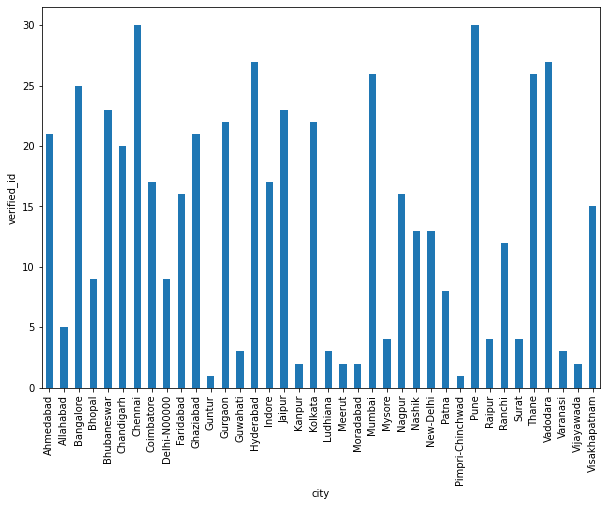

In [38]:
plt.figure(figsize=(10,7))
df.groupby('city')['verified_id'].count().plot.bar()
plt.ylabel("verified_id")
plt.show()

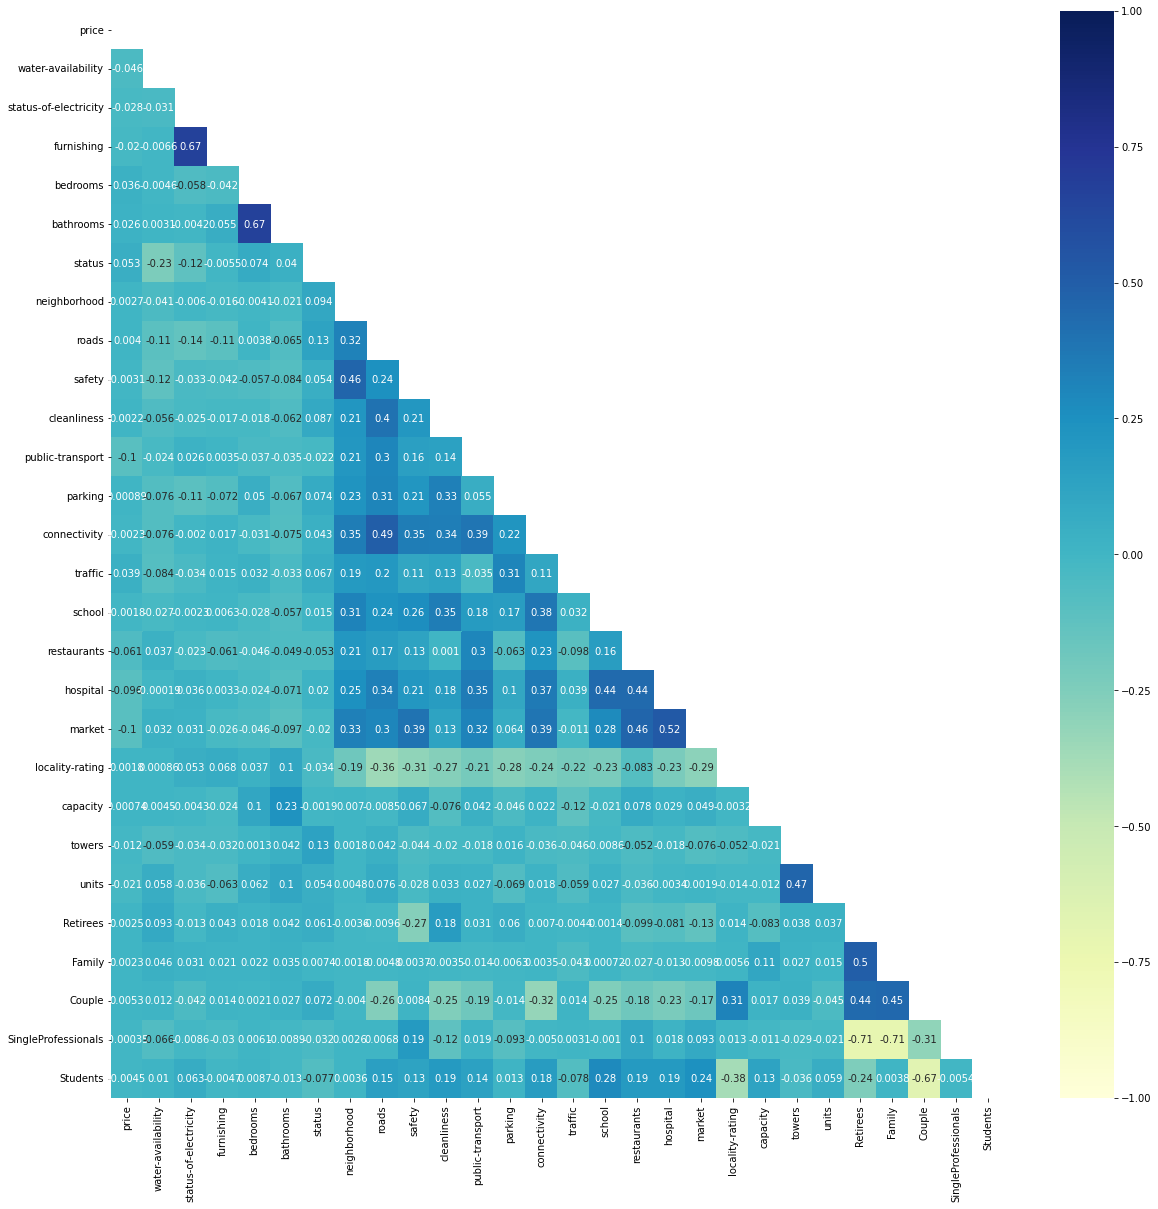

In [37]:
features = ['price', 'water-availability', 'status-of-electricity', 'furnishing', 'bedrooms', 'bathrooms','status', 'neighborhood', 'roads', 
            'safety', 'cleanliness', 'public-transport', 'parking', 'connectivity', 'traffic', 'school', 'restaurants', 'hospital', 'market', 
            'locality-rating', 'capacity', 'towers', 'units', 'Retirees', 'Family', 'Couple', 'SingleProfessionals', 'Students']

mask = np.triu(np.ones_like(df[features].corr()))
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df[features].corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

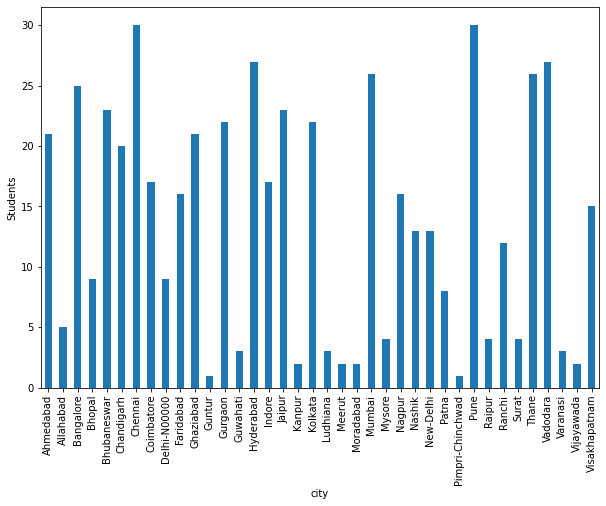

In [27]:
plt.figure(figsize=(10,7))
df.groupby('city')['Students'].count().plot.bar()
plt.ylabel("Students")
plt.show()

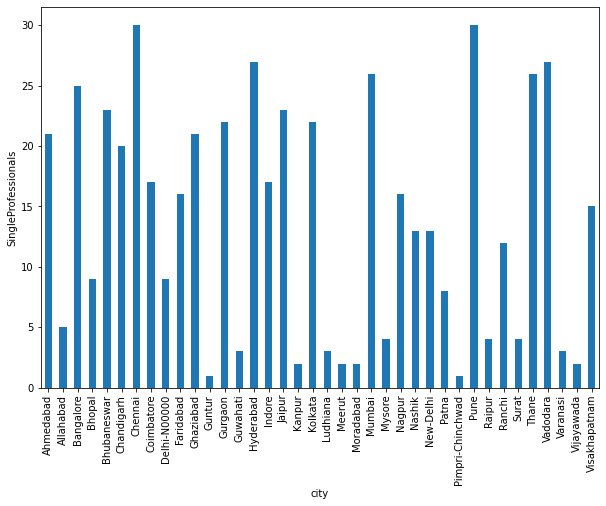

In [26]:
plt.figure(figsize=(10,7))
df.groupby('city')['SingleProfessionals'].count().plot.bar()
plt.ylabel("SingleProfessionals")
plt.show()

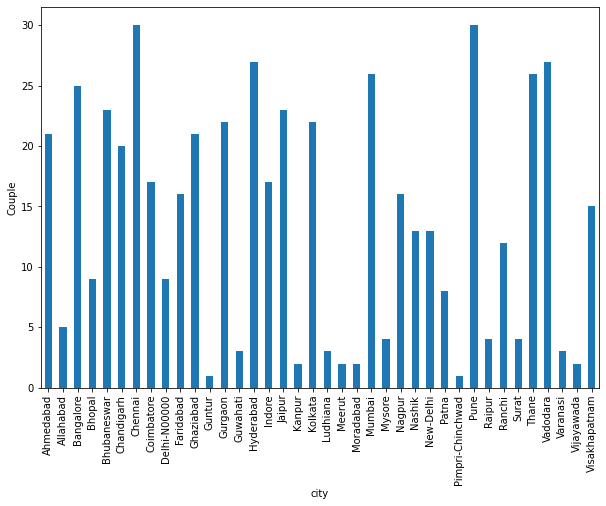

In [25]:
plt.figure(figsize=(10,7))
df.groupby('city')['Couple'].count().plot.bar()
plt.ylabel("Couple")
plt.show()

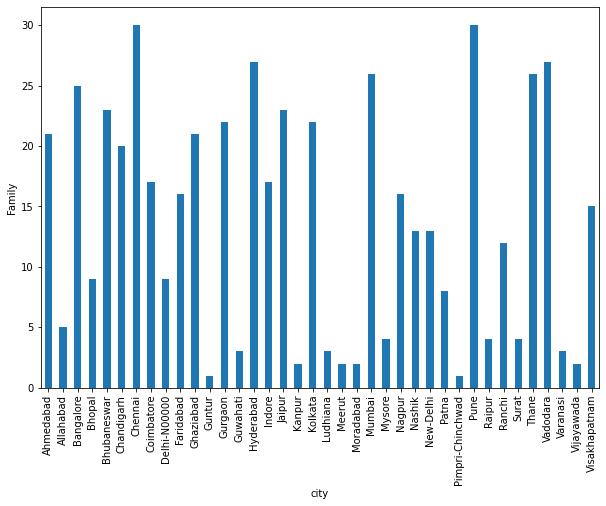

In [24]:
plt.figure(figsize=(10,7))
df.groupby('city')['Family'].count().plot.bar()
plt.ylabel("Family")
plt.show()

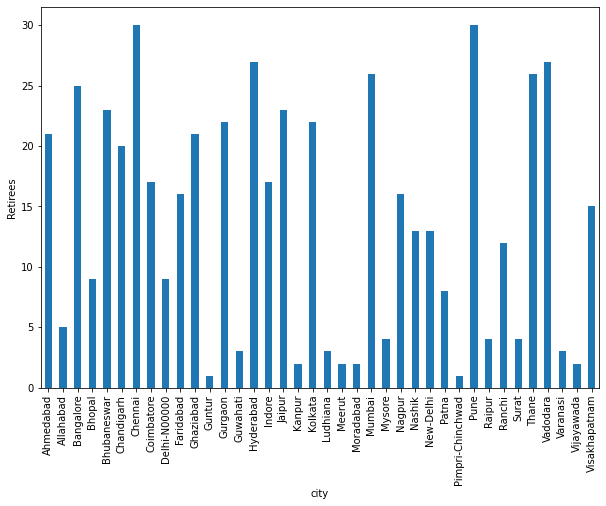

In [23]:
plt.figure(figsize=(10,7))
df.groupby('city')['Retirees'].count().plot.bar()
plt.ylabel("Retirees")
plt.show()

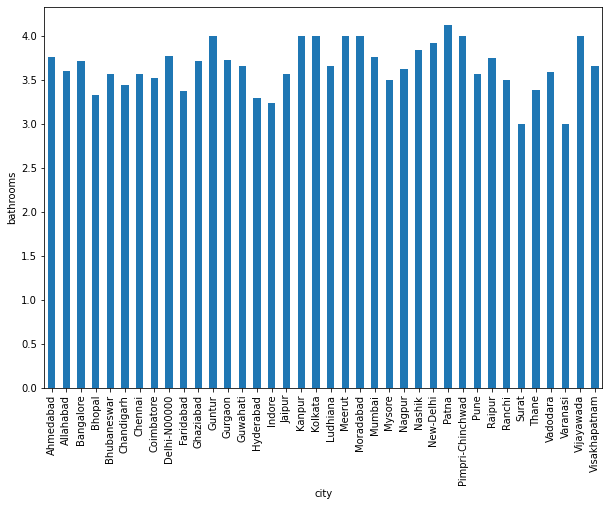

In [19]:
plt.figure(figsize=(10,7))
df.groupby('city')['bathrooms'].mean().plot.bar()
plt.ylabel("bathrooms")
plt.show()

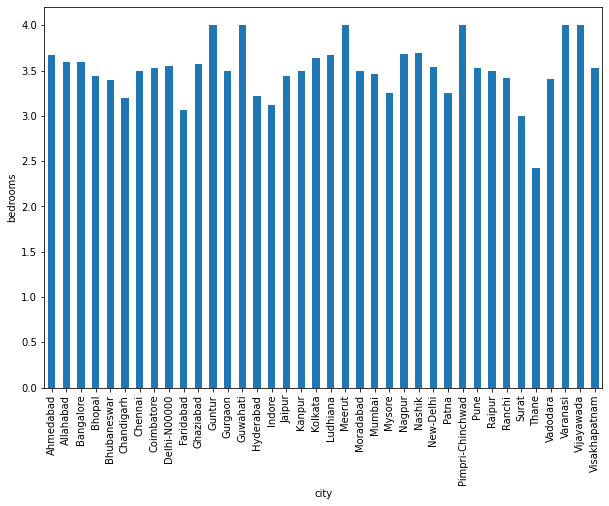

In [18]:
plt.figure(figsize=(10,7))
df.groupby('city')['bedrooms'].mean().plot.bar()
plt.ylabel("bedrooms")
plt.show()

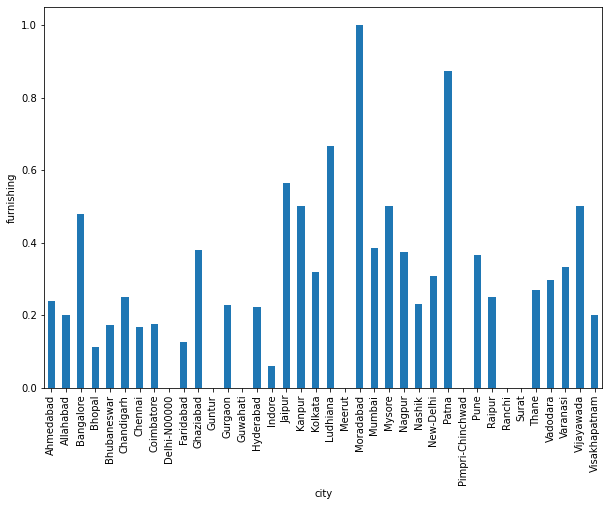

In [17]:
plt.figure(figsize=(10,7))
df.groupby('city')['furnishing'].mean().plot.bar()
plt.ylabel("furnishing")
plt.show()

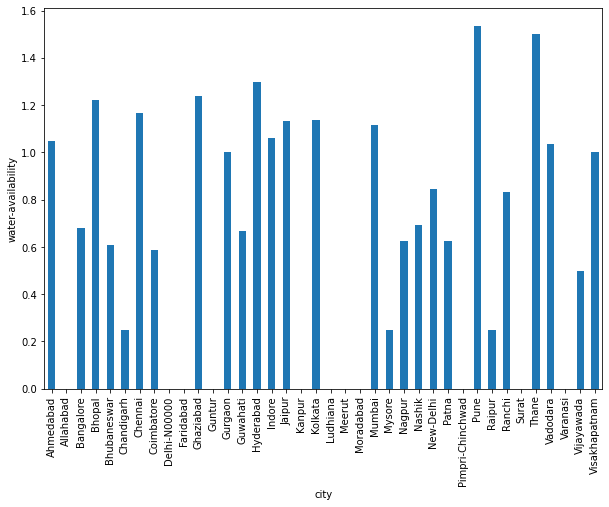

In [14]:
plt.figure(figsize=(10,7))
df.groupby('city')['water-availability'].mean().plot.bar()
plt.ylabel("water-availability")
plt.show()

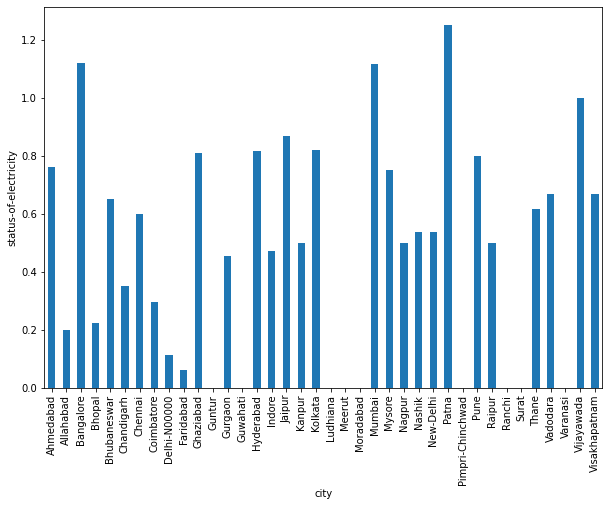

In [13]:
plt.figure(figsize=(10,7))
df.groupby('city')['status-of-electricity'].mean().plot.bar()
plt.ylabel("status-of-electricity")
plt.show()